In [3]:
# Data Handling
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns


# Data Imputing
from sklearn.impute import KNNImputer

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [4]:
ecom = pd.read_csv("E Commerce Dataset.csv")

In [5]:
ecom.shape

(5630, 20)

In [6]:
df = ecom.copy()
ecom.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [7]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [8]:
round(ecom.isnull().sum()/ecom.shape[0] * 100, 2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

In [9]:
cat_cols = ecom.dtypes[ecom.dtypes == 'object'].index

for i in cat_cols:
    print(f"{i} ---> {ecom[i].unique()}")
    print()

PreferredLoginDevice ---> ['Mobile Phone' 'Phone' 'Computer']

PreferredPaymentMode ---> ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender ---> ['Female' 'Male']

PreferedOrderCat ---> ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus ---> ['Single' 'Divorced' 'Married']



In [10]:
# Change values to lower and replace space with _ for cleaning
for i in cat_cols:
    ecom[i] = ecom[i].apply(lambda x: x.lower().replace(" ", "_"))

In [11]:
# Replacing duplicate values
ecom["PreferredLoginDevice"].replace("phone", "mobile_phone", inplace = True)
ecom["PreferredPaymentMode"].replace(["cc", "cod"], ["credit_card", "cash_on_delivery"], inplace = True)
ecom["PreferedOrderCat"].replace("mobile_phone", "mobile", inplace = True)

In [12]:
# Checking if all values are replaced
for i in cat_cols:
    print(f"{i} ---> {ecom[i].unique()}")
    print()

PreferredLoginDevice ---> ['mobile_phone' 'computer']

PreferredPaymentMode ---> ['debit_card' 'upi' 'credit_card' 'cash_on_delivery' 'e_wallet']

Gender ---> ['female' 'male']

PreferedOrderCat ---> ['laptop_&_accessory' 'mobile' 'others' 'fashion' 'grocery']

MaritalStatus ---> ['single' 'divorced' 'married']



In [13]:
# Encoding before imputing missing values
ecom_encoded = pd.get_dummies(ecom, drop_first = True)

In [14]:
# Using KNN Imputer
impute = KNNImputer(n_neighbors = 5)
ecom_imputed = impute.fit_transform(ecom_encoded)

In [15]:
# Converting the imputed array to dataframe
ecom_imputed = pd.DataFrame(ecom_imputed, columns = ecom_encoded.columns)

In [16]:
# Replacing the old columns with imputed values for analysis
missing_cols = ecom.isnull().sum()[ecom.isnull().sum() > 0].index

for i in missing_cols:
    ecom[i] = ecom_imputed[i]

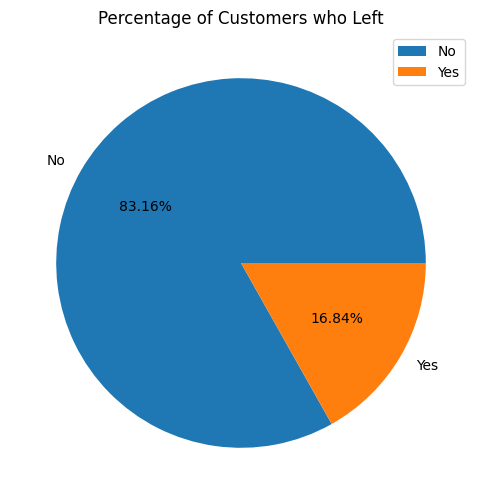

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [15,6])

percent_count = ecom['Churn'].value_counts(normalize = True)
ax.pie(x = ecom['Churn'].value_counts(),labels = ["No", "Yes"], autopct = lambda percent_count: '{:.2f}%'.format(percent_count))
ax.set_title('Percentage of Customers who Left', fontsize = 12)
ax.legend()

plt.show()

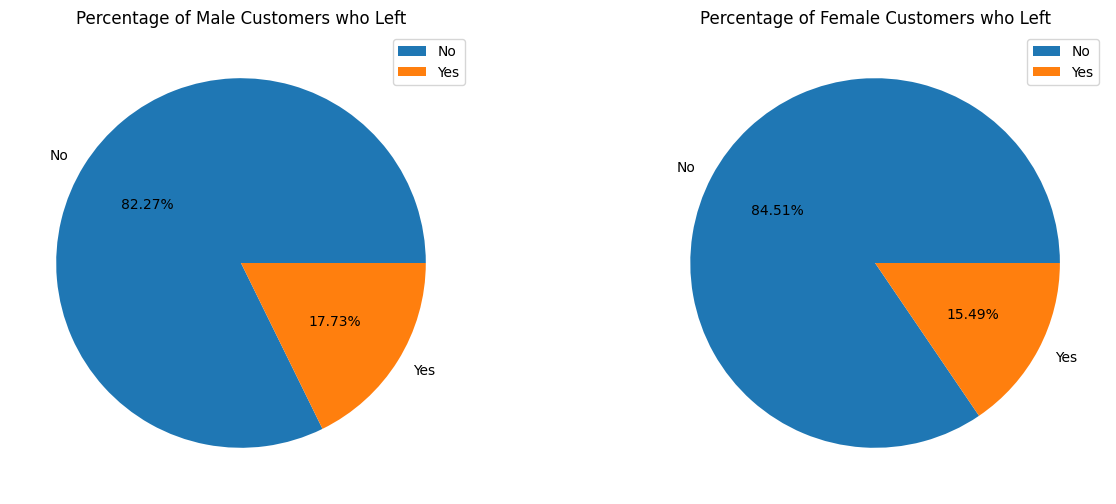

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = [15,6])

percent_count = ecom[ecom["Gender"] == "male"]['Churn'].value_counts(normalize = True)
ax1.pie(x = ecom[ecom["Gender"] == "male"]['Churn'].value_counts(),labels = ["No", "Yes"], autopct = lambda percent_count: '{:.2f}%'.format(percent_count))
ax1.set_title('Percentage of Male Customers who Left', fontsize = 12)
ax1.legend()

percent_count = ecom[ecom["Gender"] == "female"]['Churn'].value_counts(normalize = True)
ax2.pie(x = ecom[ecom["Gender"] == "female"]['Churn'].value_counts(),labels = ["No", "Yes"], autopct = lambda percent_count: '{:.2f}%'.format(percent_count))
ax2.set_title('Percentage of Female Customers who Left', fontsize = 12)
ax2.legend()

plt.show()

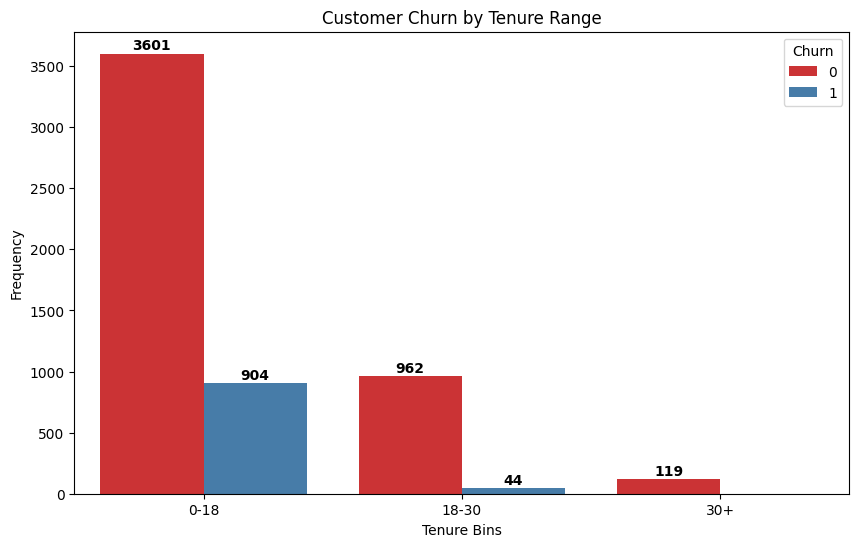

In [19]:
# Creating Tenure Groups
bins = [0, 18, 30, np.inf]
labels = ['0-18', '18-30', '30+']
ecom['TenureRange'] = pd.cut(ecom['Tenure'], bins = bins, labels = labels, right = False, include_lowest = True)

plt.figure(figsize=(10,6))
ax = sns.countplot(data = ecom, x = 'TenureRange', hue = 'Churn', palette = 'Set1')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha = 'center', va = 'baseline', 
                    xytext = (0, 3), weight = 'bold',
                    textcoords = 'offset points')

plt.title('Customer Churn by Tenure Range')
plt.xlabel('Tenure Bins')
plt.ylabel('Frequency')
plt.show()

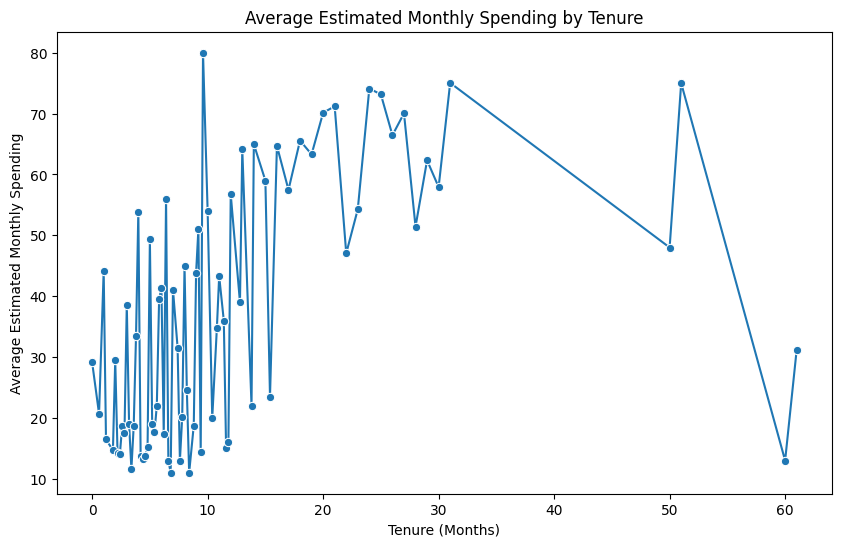

In [20]:
ecom['EstimatedMonthlySpending'] = ecom['OrderCount'] * ecom['OrderAmountHikeFromlastYear']
tenure_spending_avg = ecom.groupby('Tenure')['EstimatedMonthlySpending'].mean().reset_index()

plt.figure(figsize = (10,6))
sns.lineplot(data = tenure_spending_avg, x = 'Tenure', y = 'EstimatedMonthlySpending', marker = 'o')
plt.title('Average Estimated Monthly Spending by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Average Estimated Monthly Spending')
plt.show()

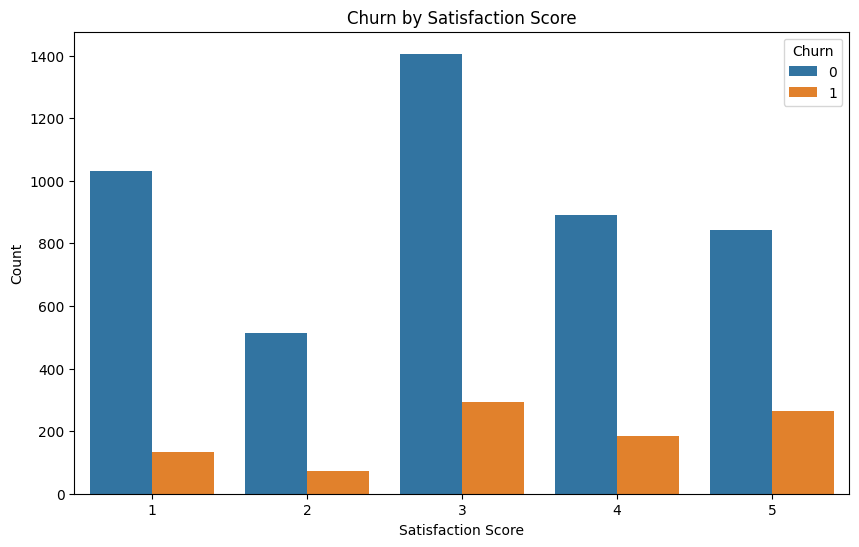

In [21]:
plt.figure(figsize = (10,6))
sns.countplot(data = ecom, x = 'SatisfactionScore', hue = 'Churn')
plt.title('Churn by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title = 'Churn')
plt.show()

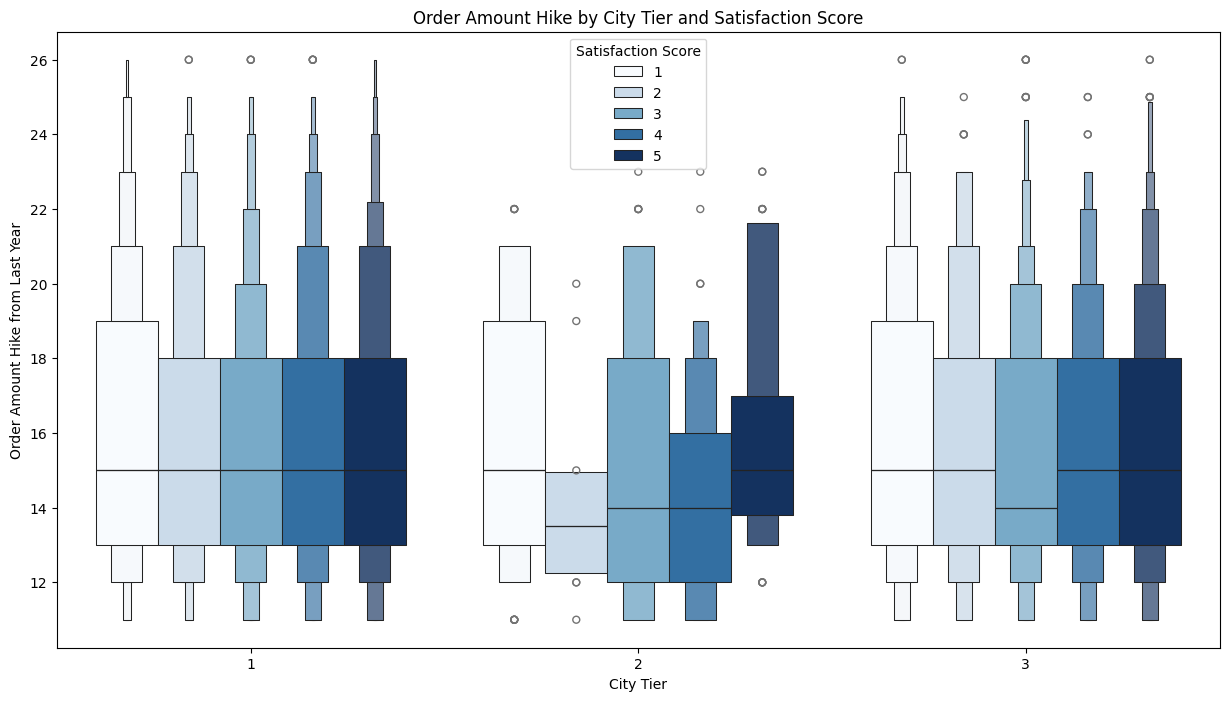

In [22]:
plt.figure(figsize=(15,8))
sns.boxenplot(data=ecom, x='CityTier', y='OrderAmountHikeFromlastYear', hue='SatisfactionScore', palette='Blues')
plt.title('Order Amount Hike by City Tier and Satisfaction Score')
plt.xlabel('City Tier')
plt.ylabel('Order Amount Hike from Last Year')
plt.legend(title='Satisfaction Score', loc = "upper center")
plt.show()

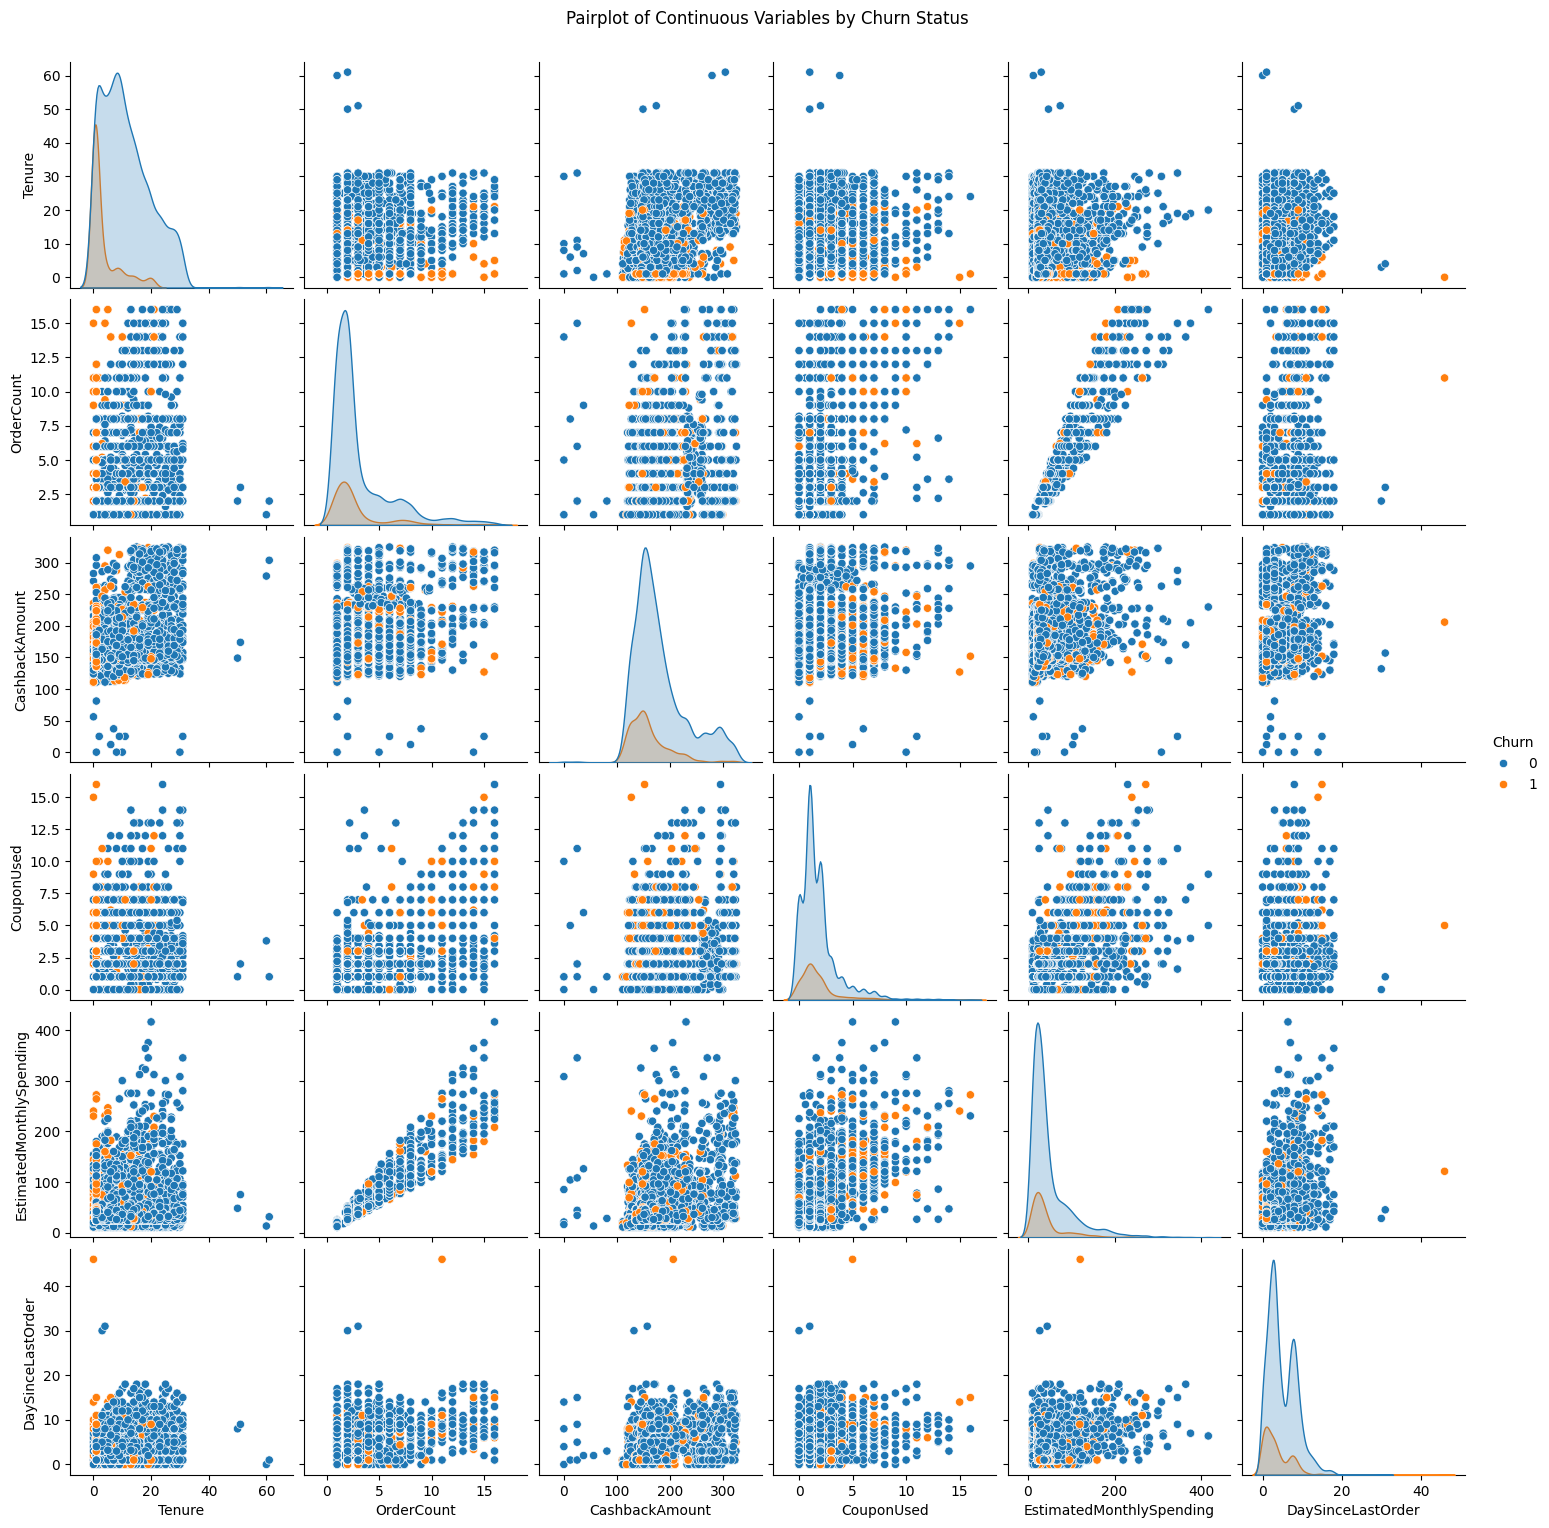

In [23]:
sns.pairplot(ecom, vars=['Tenure', 'OrderCount', 'CashbackAmount', 'CouponUsed','EstimatedMonthlySpending', 'DaySinceLastOrder'], hue = 'Churn')
plt.suptitle('Pairplot of Continuous Variables by Churn Status', y = 1.02)
plt.show()

In [24]:
x = ecom.drop(columns = ["CustomerID", "Churn", "EstimatedMonthlySpending", "TenureRange"])
X = pd.get_dummies(x, drop_first = True)
y = ecom["Churn"]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [27]:
log = LogisticRegression(random_state = 123)
log.fit(x_train, y_train)

LogisticRegression(random_state=123)

In [28]:
y_pred = log.predict(x_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       938
           1       0.75      0.52      0.61       188

    accuracy                           0.89      1126
   macro avg       0.83      0.74      0.77      1126
weighted avg       0.88      0.89      0.88      1126



<Axes: >

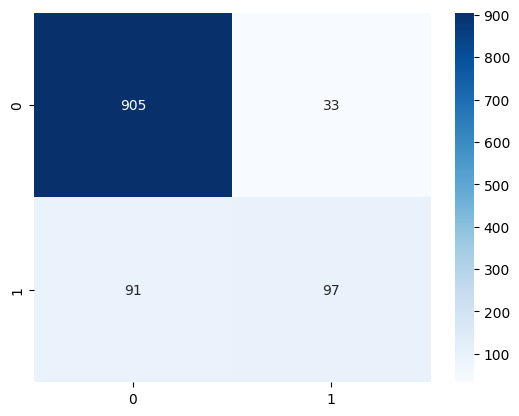

In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".5g", cmap = "Blues")

In [31]:

dt = DecisionTreeClassifier(random_state = 123)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=123)

In [32]:
y_pred = dt.predict(x_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       938
           1       0.86      0.86      0.86       188

    accuracy                           0.95      1126
   macro avg       0.91      0.92      0.92      1126
weighted avg       0.95      0.95      0.95      1126



<Axes: >

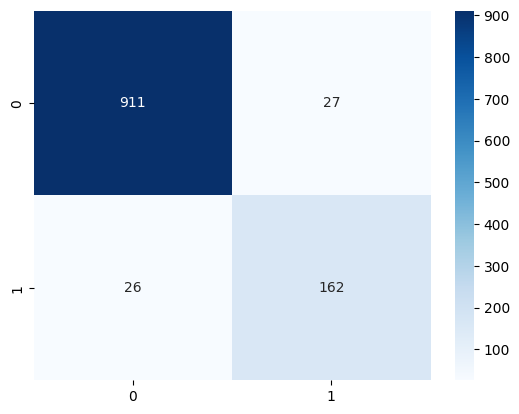

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".5g", cmap = "Blues")

In [35]:
rf = RandomForestClassifier(random_state = 123)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=123)

In [36]:
y_pred = rf.predict(x_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       938
           1       0.97      0.82      0.89       188

    accuracy                           0.97      1126
   macro avg       0.97      0.91      0.93      1126
weighted avg       0.97      0.97      0.96      1126



<Axes: >

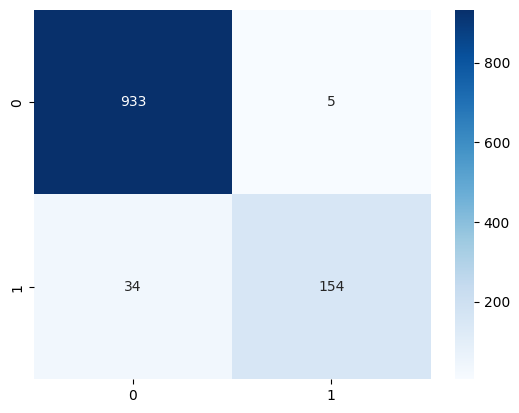

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".5g", cmap = "Blues")

In [39]:
# Predicting the whole dataset using the model
Y_pred = rf.predict(X)

In [40]:
# Creating a dataset with customers corresponding to the predictions
new_df = pd.concat((ecom['CustomerID'], pd.Series(Y_pred)), axis = 1)
new_df.columns = ["CustomerID", "Churn"]
new_df.head()

,CustomerID,Churn
0,50001,1
1,50002,1
2,50003,1
3,50004,1
4,50005,1


In [41]:
new_df[new_df['Churn'] == 1]

,CustomerID,Churn
0,50001,1
1,50002,1
2,50003,1
3,50004,1
4,50005,1
...,...,...
5556,55557,1
5598,55599,1
5602,55603,1
5604,55605,1
